In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
# # aggregate energy results for each control strategy based on trajectory data
# simulation_timeStep = 0.2 # used to calculate travel time
# powertrain_tech = "ICEV"
# petroleum_equivalent_factor = 28996 # old value is 23160
# fueltype = ["ICEV_fuel", "BEV_energy", "PHEV_electric_power", "PHEV_fuel", "HFCV_energy", "hev_fuel"]
# control_method = ["No_control", "Signal_optimization_only", "Eco-Driving_only", "Proposed_control"]
# demand_perct = [10, 50, 100]
# cav_perct = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# # major_sections = [5284,1246,1267,1248,1269,1249,1270,1272,1252,1253,1274,1275,1254,1282,1261,1262,1283,1263,1284]
# energy_df = pd.DataFrame(columns=['control_method', 'demand_percent', 'cav_percent', 'average_energy_consumption', 'travel_time'])

# for control_strategy in control_method:
#     for demand in demand_perct:
#         for cav in cav_perct:
#             files = "results/" + control_strategy + "_demand" + str(demand) + "_CAV" + str(cav) + '_*.csv'
#             file_list = glob.glob(files)
            
#             energy_per_km_per_vehicle = 0
#             avg_travel_time = 0
#             num_repli = 0

#             for file in file_list:
#                 df = pd.read_csv(file, delimiter='\t')
#                 num_repli += 1
#                 veh_ids = df.vehicle_id.unique()
#                 num_vehicles = len(veh_ids)
#                 energy_per_km = 0
#                 travel_time = 0
#                 for idx in veh_ids:
#                     df_by_vehicle = df[df['vehicle_id']==idx]
#                     travel_time += df_by_vehicle.shape[0] * simulation_timeStep / 60 # convert to minutes
#                     cumulative_distance = df_by_vehicle['driving_distance'].sum()

#                     if powertrain_tech == "ICEV":
#                         total_energy = df_by_vehicle[fueltype[0]].sum()
#                     elif powertrain_tech == "BEV":
#                         total_energy = df_by_vehicle[fueltype[1]].sum() / petroleum_equivalent_factor
#                     elif powertrain_tech == "PHEV":
#                         total_energy_1 = df_by_vehicle[fueltype[2]].sum()
#                         total_energy_2 = df_by_vehicle[fueltype[3]].sum()
#                         total_energy = total_energy_1 / petroleum_equivalent_factor + total_energy_2 
#                     elif powertrain_tech == "HFCV":
#                         total_energy = df_by_vehicle[fueltype[4]].sum()
#                     elif powertrain_tech == "HEV":
#                         total_energy = df_by_vehicle[fueltype[5]].sum()
                    
#                     energy_per_km += total_energy / cumulative_distance
                
#                 avg_travel_time += travel_time / num_vehicles
#                 energy_per_km_per_vehicle += energy_per_km / num_vehicles

#             repliAvg_energy_per_km = energy_per_km_per_vehicle / num_repli
#             repliAvg_travel_time = avg_travel_time / num_repli
#             df1 = pd.DataFrame({'control_method': [control_strategy], 'demand_percent' :[demand], 'cav_percent': [cav], 'average_energy_consumption': [repliAvg_energy_per_km], 'travel_time': [repliAvg_travel_time]})
#             energy_df = energy_df.append(df1, ignore_index = True)



In [2]:
# aggregate energy results for each control strategy based on vehicle aggregated data
powertrain_tech = "ICEV"
petroleum_equivalent_factor = 28996 # old value is 23160
fueltype = ["ICEV_fuel", "BEV_energy", "PHEV_electric_power", "PHEV_fuel", "HFCV_energy", "hev_fuel"]
control_method = ["No_control", "Signal_optimization_only", "Eco-Driving_only", "Proposed_control"]
demand_perct = [10, 50, 100]
cav_perct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
major_sections = [5284,1246,1267,1248,1269,1249,1270,1272,1252,1253,1274,1275,1254,1282,1261,1262,1283,1263,1284]
energy_df = pd.DataFrame(columns=['control_method', 'demand_percent', 'cav_percent', 'cav_energy_consumption (l)', 'noncav_energy_consumption (l)', 'overall_energy_consumption (l)', \
                                  'cav_travel_time (min)', 'noncav_travel_time (min)', 'overall_travel_time (min)'])

for control_strategy in control_method:
    for demand in demand_perct:
        for cav in cav_perct:
            files = "agg_results/" + control_strategy + "_demand" + str(demand) + "_CAV" + str(cav) + '_*.csv'
            file_list = glob.glob(files)           
            energy_overall = energy_cav = energy_noncav = travel_time_overall = travel_time_cav = travel_time_noncav = 0
            num_repli = 0

            for file in file_list:
                df = pd.read_csv(file, delimiter='\t')
                num_repli += 1
                veh_ids = df.vehicle_id.unique()
                num_vehicles = len(veh_ids)
                df['energy_km'] = df['vehicle_trip_energy'] / df['vehicle_trip_distance']
                energy_overall += df['energy_km'].sum() / num_vehicles
                energy_cav += df[df['vehicle_type_id'] == 5428]['energy_km'].sum() / len(df[df['vehicle_type_id'] == 5428])
                energy_noncav += df[df['vehicle_type_id'] == 5429]['energy_km'].sum() / len(df[df['vehicle_type_id'] == 5429])
                travel_time_overall += df['vehicle_trip_travel_time'].sum() / (60 * num_vehicles)
                travel_time_cav += df[df['vehicle_type_id'] == 5428]['vehicle_trip_travel_time'].sum() / (60 * len(df[df['vehicle_type_id'] == 5428]))
                travel_time_noncav += df[df['vehicle_type_id'] == 5429]['vehicle_trip_travel_time'].sum() / (60 * len(df[df['vehicle_type_id'] == 5429]))
            
            repliAvg_energy_overall = energy_overall / num_repli
            repliAvg_energy_cav = energy_cav / num_repli
            repliAvg_energy_noncav = energy_noncav / num_repli
            repliAvg_travel_time_overall = travel_time_overall / num_repli
            repliAvg_travel_time_cav = travel_time_cav / num_repli
            repliAvg_travel_time_noncav = travel_time_noncav / num_repli
            df1 = pd.DataFrame({'control_method': [control_strategy], 'demand_percent' :[demand], 'cav_percent': [cav], 'cav_energy_consumption (l)': [repliAvg_energy_cav],\
                                 'noncav_energy_consumption (l)': [repliAvg_energy_noncav], 'overall_energy_consumption (l)': [repliAvg_energy_overall], 'cav_travel_time (min)': [repliAvg_travel_time_cav], \
                                    'noncav_travel_time (min)': [repliAvg_travel_time_noncav], 'overall_travel_time (min)': [repliAvg_travel_time_overall]})
            energy_df = energy_df.append(df1, ignore_index = True)
                
                


d:\projects\eco-driving_powertrainOpt\.venv\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
d:\projects\eco-driving_powertrainOpt\.venv\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


In [3]:
df_test = energy_df.loc[(energy_df['demand_percent'] == 100) & (energy_df['cav_percent'] == 60)]
df_test.head()

,control_method,demand_percent,cav_percent,cav_energy_consumption (l),noncav_energy_consumption (l),overall_energy_consumption (l),cav_travel_time (min),noncav_travel_time (min),overall_travel_time (min)
25,No_control,100,60,0.610237,0.617337,0.613121,3.573224,3.573232,3.573159
55,Signal_optimization_only,100,60,0.391465,0.394781,0.392813,2.288359,2.277347,2.283867
85,Eco-Driving_only,100,60,0.547663,0.560845,0.553005,6.299477,6.306592,6.302273
115,Proposed_control,100,60,0.392517,0.394427,0.393290,4.554498,4.523018,4.541692


In [4]:
energy_df = energy_df[energy_df['cav_percent'] != 0]
energy_df.to_csv('agg_results/average_energy_results.csv', sep='\t')

In [5]:
energy_df.head(100)

,control_method,demand_percent,cav_percent,cav_energy_consumption (l),noncav_energy_consumption (l),overall_energy_consumption (l),cav_travel_time (min),noncav_travel_time (min),overall_travel_time (min)
0,No_control,10,10,0.239110,0.250275,0.249738,2.863458,2.737963,2.747666
1,No_control,10,20,0.303221,0.310474,0.309580,2.718961,2.743893,2.740796
2,No_control,10,30,0.355472,0.382312,0.374262,2.712067,2.738516,2.727376
3,No_control,10,40,0.315398,0.330426,0.324335,2.796955,2.717634,2.749583
4,No_control,10,50,0.248141,0.245850,0.246973,2.715612,2.731977,2.723275
...,...,...,...,...,...,...,...,...,...
95,Proposed_control,10,60,0.311828,0.270902,0.295950,5.721090,5.625660,5.684236
96,Proposed_control,10,70,0.380288,0.379261,0.379960,5.624055,5.679043,5.640887
97,Proposed_control,10,80,0.388915,0.321137,0.377158,5.632824,5.624916,5.629033
98,Proposed_control,10,90,0.257885,0.232743,0.255247,5.622918,5.266016,5.582689


In [6]:
# calculate energy savings for each control strategy
savings = pd.DataFrame(columns=['demand', 'cav', 'cav_signal_optimization_energy', 'cav_signal_optimization_tt', 'noncav_signal_optimization_energy', 'noncav_signal_optimization_tt',\
                                'overall_signal_optimization_energy', 'overall_signal_optimization_tt','cav_eco-drive_only_energy', 'cav_eco-drive_only_tt', 'noncav_eco-drive_only_energy', 'noncav_eco-drive_only_tt',\
                                'overall_eco-drive_only_energy', 'overall_eco-drive_only_tt', 'cav_cooperative_control_energy', 'cav_cooperative_control_tt', 'noncav_cooperative_control_energy', 'noncav_cooperative_control_tt', \
                                'overall_cooperative_control_energy', 'overall_cooperative_control_tt'])

for demand in demand_perct:
    for cav in cav_perct:
        overall_energy_no_control = energy_df.loc[(energy_df['control_method']=='No_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'overall_energy_consumption (l)'].item()
        overall_tt_no_control = energy_df.loc[(energy_df['control_method']=='No_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'overall_travel_time (min)'].item()
        cav_energy_no_control = energy_df.loc[(energy_df['control_method']=='No_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'cav_energy_consumption (l)'].item()
        cav_tt_no_control = energy_df.loc[(energy_df['control_method']=='No_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'cav_travel_time (min)'].item()
        noncav_energy_no_control = energy_df.loc[(energy_df['control_method']=='No_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'noncav_energy_consumption (l)'].item()
        noncav_tt_no_control = energy_df.loc[(energy_df['control_method']=='No_control') & (energy_df['demand_percent']==demand)    
                                          & (energy_df['cav_percent']==cav), 'noncav_travel_time (min)'].item()

        overall_energy_sig_opt = energy_df.loc[(energy_df['control_method']=='Signal_optimization_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'overall_energy_consumption (l)'].item()
        overall_tt_sig_opt = energy_df.loc[(energy_df['control_method']=='Signal_optimization_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'overall_travel_time (min)'].item()
        cav_energy_sig_opt = energy_df.loc[(energy_df['control_method']=='Signal_optimization_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'cav_energy_consumption (l)'].item()
        cav_tt_sig_opt = energy_df.loc[(energy_df['control_method']=='Signal_optimization_only') & (energy_df['demand_percent']==demand)    
                                          & (energy_df['cav_percent']==cav), 'cav_travel_time (min)'].item()
        noncav_energy_sig_opt = energy_df.loc[(energy_df['control_method']=='Signal_optimization_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'noncav_energy_consumption (l)'].item()
        noncav_tt_sig_opt = energy_df.loc[(energy_df['control_method']=='Signal_optimization_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'noncav_travel_time (min)'].item()
        
        overall_energy_eco_drive = energy_df.loc[(energy_df['control_method']=='Eco-Driving_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'overall_energy_consumption (l)'].item()
        overall_tt_eco_drive = energy_df.loc[(energy_df['control_method']=='Eco-Driving_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'overall_travel_time (min)'].item()
        cav_energy_eco_drive = energy_df.loc[(energy_df['control_method']=='Eco-Driving_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'cav_energy_consumption (l)'].item()
        cav_tt_eco_drive = energy_df.loc[(energy_df['control_method']=='Eco-Driving_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'cav_travel_time (min)'].item()
        noncav_energy_eco_drive = energy_df.loc[(energy_df['control_method']=='Eco-Driving_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'noncav_energy_consumption (l)'].item()
        noncav_tt_eco_drive = energy_df.loc[(energy_df['control_method']=='Eco-Driving_only') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'noncav_travel_time (min)'].item()
        
        overall_energy_cooperative_control = energy_df.loc[(energy_df['control_method']=='Proposed_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'overall_energy_consumption (l)'].item()
        overall_tt_cooperative_control = energy_df.loc[(energy_df['control_method']=='Proposed_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'overall_travel_time (min)'].item()
        cav_energy_cooperative_control = energy_df.loc[(energy_df['control_method']=='Proposed_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'cav_energy_consumption (l)'].item()
        cav_tt_cooperative_control = energy_df.loc[(energy_df['control_method']=='Proposed_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'cav_travel_time (min)'].item()
        noncav_energy_cooperative_control = energy_df.loc[(energy_df['control_method']=='Proposed_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'noncav_energy_consumption (l)'].item()
        noncav_tt_cooperative_control = energy_df.loc[(energy_df['control_method']=='Proposed_control') & (energy_df['demand_percent']==demand)
                                          & (energy_df['cav_percent']==cav), 'noncav_travel_time (min)'].item()
        
        overall_energy_saving_sig_opt = (overall_energy_no_control - overall_energy_sig_opt) / overall_energy_no_control * 100
        overall_tt_saving_sig_opt = (overall_tt_no_control - overall_tt_sig_opt) / overall_tt_no_control * 100
        cav_energy_saving_sig_opt = (cav_energy_no_control - cav_energy_sig_opt) / cav_energy_no_control * 100
        cav_tt_saving_sig_opt = (cav_tt_no_control - cav_tt_sig_opt) / cav_tt_no_control * 100
        noncav_energy_saving_sig_opt = (noncav_energy_no_control - noncav_energy_sig_opt) / noncav_energy_no_control * 100
        noncav_tt_saving_sig_opt = (noncav_tt_no_control - noncav_tt_sig_opt) / noncav_tt_no_control * 100
        overall_energy_saving_eco_drive = (overall_energy_no_control - overall_energy_eco_drive) / overall_energy_no_control * 100
        overall_tt_saving_eco_drive = (overall_tt_no_control - overall_tt_eco_drive) / overall_tt_no_control * 100
        cav_energy_saving_eco_drive = (cav_energy_no_control - cav_energy_eco_drive) / cav_energy_no_control * 100
        cav_tt_saving_eco_drive = (cav_tt_no_control - cav_tt_eco_drive) / cav_tt_no_control * 100
        noncav_energy_saving_eco_drive = (noncav_energy_no_control - noncav_energy_eco_drive) / noncav_energy_no_control * 100
        noncav_tt_saving_eco_drive = (noncav_tt_no_control - noncav_tt_eco_drive) / noncav_tt_no_control * 100
        overall_energy_saving_cooperative_control = (overall_energy_no_control - overall_energy_cooperative_control) / overall_energy_no_control * 100
        overall_tt_saving_cooperative_control = (overall_tt_no_control - overall_tt_cooperative_control) / overall_tt_no_control * 100
        cav_energy_saving_cooperative_control = (cav_energy_no_control - cav_energy_cooperative_control) / cav_energy_no_control * 100
        cav_tt_saving_cooperative_control = (cav_tt_no_control - cav_tt_cooperative_control) / cav_tt_no_control * 100
        noncav_energy_saving_cooperative_control = (noncav_energy_no_control - noncav_energy_cooperative_control) / noncav_energy_no_control * 100
        noncav_tt_saving_cooperative_control = (noncav_tt_no_control - noncav_tt_cooperative_control) / noncav_tt_no_control * 100

        df2 = pd.DataFrame({'demand': [demand], 'cav': [cav], 'cav_signal_optimization_energy': [cav_energy_saving_sig_opt], 'cav_signal_optimization_tt': [cav_tt_saving_sig_opt], \
                            'noncav_signal_optimization_energy': [noncav_energy_saving_sig_opt], 'noncav_signal_optimization_tt': [noncav_tt_saving_sig_opt], 'overall_signal_optimization_energy': [overall_energy_saving_sig_opt], \
                            'overall_signal_optimization_tt': [overall_tt_saving_sig_opt], 'cav_eco-drive_only_energy': [cav_energy_saving_eco_drive], 'cav_eco-drive_only_tt': [cav_tt_saving_eco_drive], \
                            'noncav_eco-drive_only_energy': [noncav_energy_saving_eco_drive], 'noncav_eco-drive_only_tt': [noncav_tt_saving_eco_drive], 'overall_eco-drive_only_energy': [overall_energy_saving_eco_drive], \
                            'overall_eco-drive_only_tt': [overall_tt_saving_eco_drive], 'cav_cooperative_control_energy': [cav_energy_saving_cooperative_control], 'cav_cooperative_control_tt': [cav_tt_saving_cooperative_control], \
                            'noncav_cooperative_control_energy': [noncav_energy_saving_cooperative_control], 'noncav_cooperative_control_tt': [noncav_tt_saving_cooperative_control], 'overall_cooperative_control_energy': [overall_energy_saving_cooperative_control], \
                            'overall_cooperative_control_tt': [overall_tt_saving_cooperative_control]
                           })
        savings = savings.append(df2, ignore_index = True)
    


In [7]:
savings.to_csv('agg_results/energy_saving.csv')

In [17]:
savings.head()

,demand,cav,cav_signal_optimization_energy,cav_signal_optimization_tt,noncav_signal_optimization_energy,noncav_signal_optimization_tt,overall_signal_optimization_energy,overall_signal_optimization_tt,cav_eco-drive_only_energy,cav_eco-drive_only_tt,noncav_eco-drive_only_energy,noncav_eco-drive_only_tt,overall_eco-drive_only_energy,overall_eco-drive_only_tt,cav_cooperative_control_energy,cav_cooperative_control_tt,noncav_cooperative_control_energy,noncav_cooperative_control_tt,overall_cooperative_control_energy,overall_cooperative_control_tt
0,10,10,-0.388360,-0.585987,-3.047240,-4.731850,-2.753877,-4.273913,-0.791034,-2.051839,0.076699,0.143653,-0.003121,-0.100277,-0.127346,-1.351883,-3.094571,-4.646042,-2.770321,NaN
1,10,20,-7.918744,-4.248664,-3.247917,-5.042954,-3.883003,-4.800759,-0.026824,-0.755952,0.493131,0.325123,0.422151,0.147805,-7.798139,-4.675388,-3.161510,-4.927004,-3.788226,NaN
2,10,30,-6.154534,-4.836358,-1.364889,-0.949257,-2.756090,-2.127445,-0.700101,-1.429214,-0.182300,-0.073884,-0.338993,-0.488454,-5.907951,-5.277132,-1.620253,-1.221167,-2.861589,NaN
3,10,40,1.163759,-0.308854,-2.458452,-2.096116,-1.037047,-1.362321,-0.045679,-1.003521,-0.009383,0.280774,-0.023839,-0.245825,1.449013,-0.628429,-2.422911,-1.872048,-0.903485,NaN
4,10,50,0.191987,-0.823588,-2.817746,-1.245415,-1.248837,-1.034688,-0.141785,-1.404348,0.096441,0.442593,-0.028627,-0.513366,0.705755,-1.305380,-2.648643,-0.633355,-0.900681,NaN


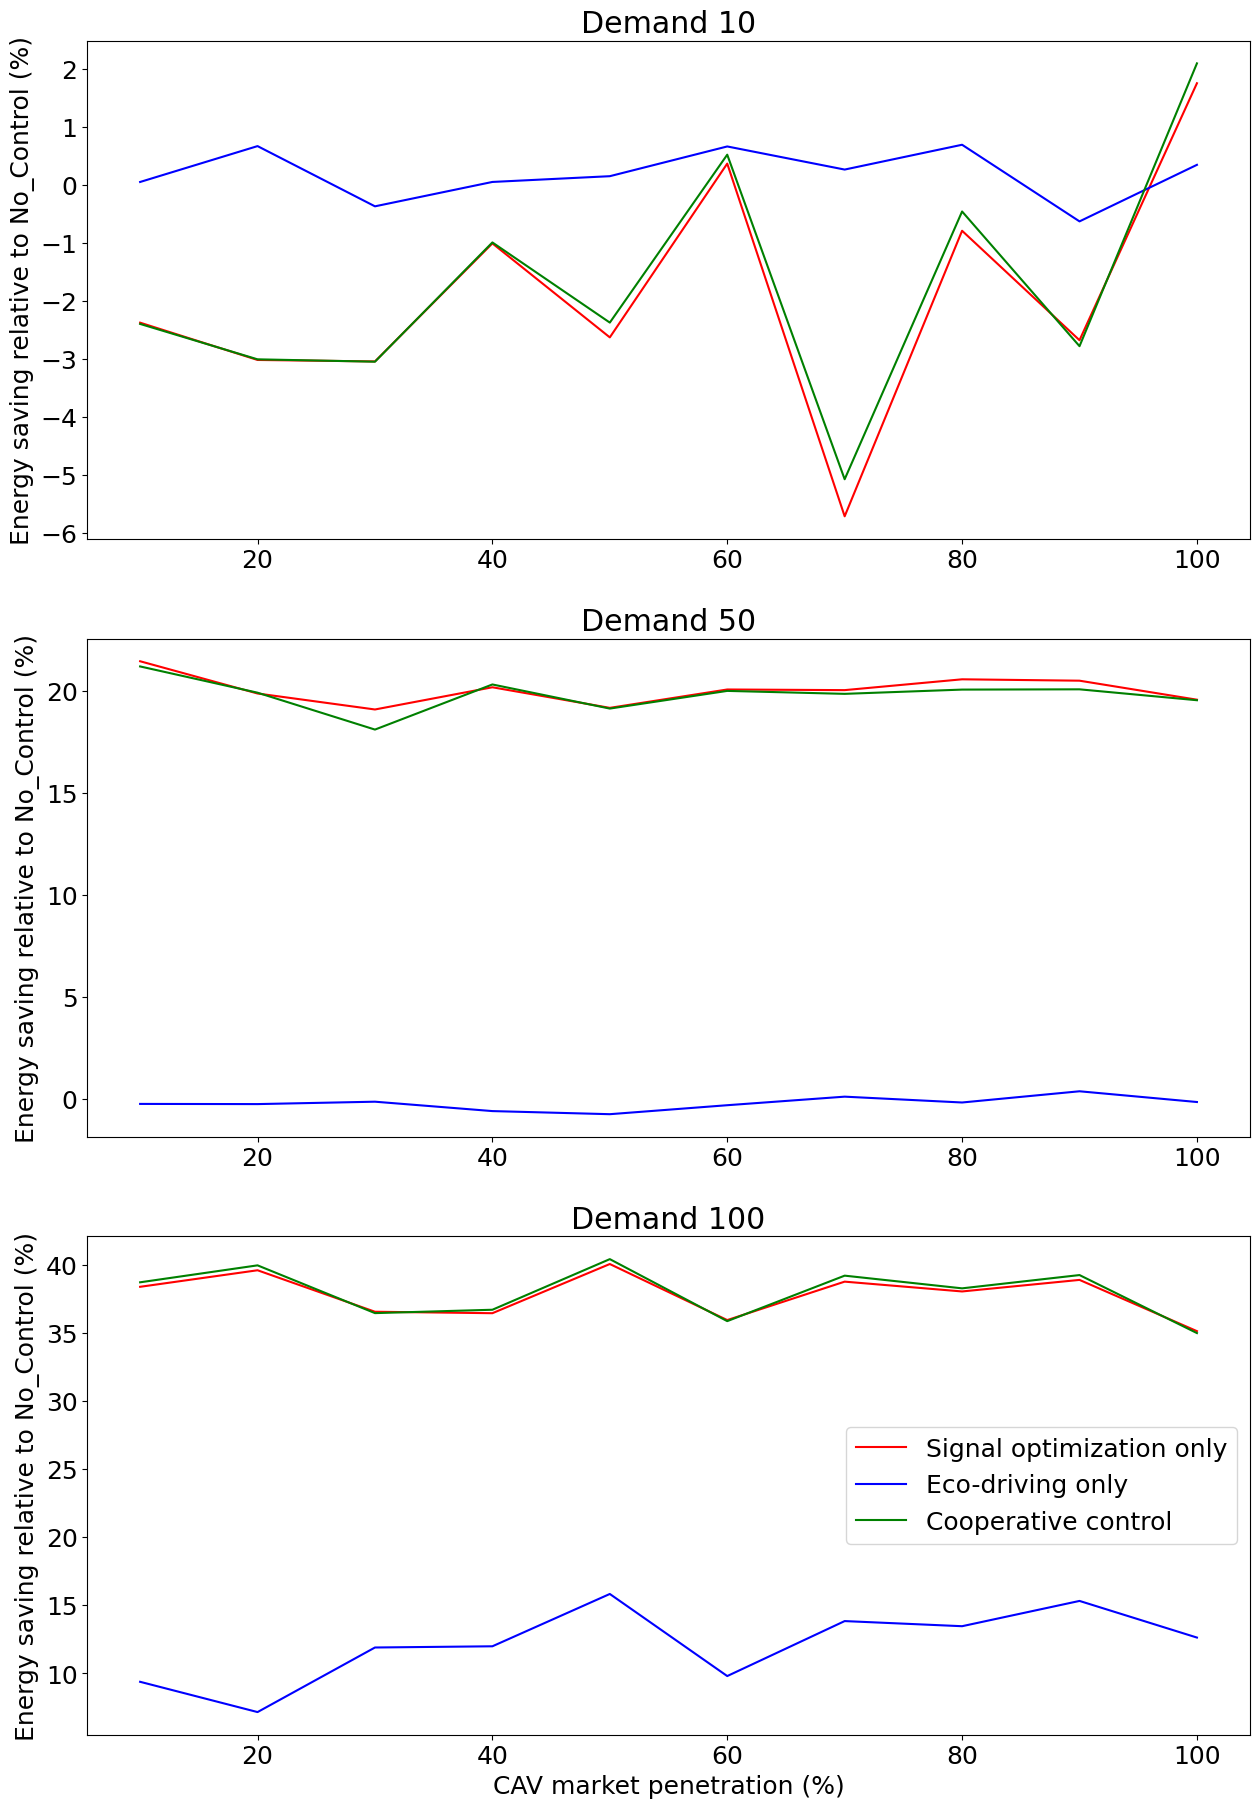

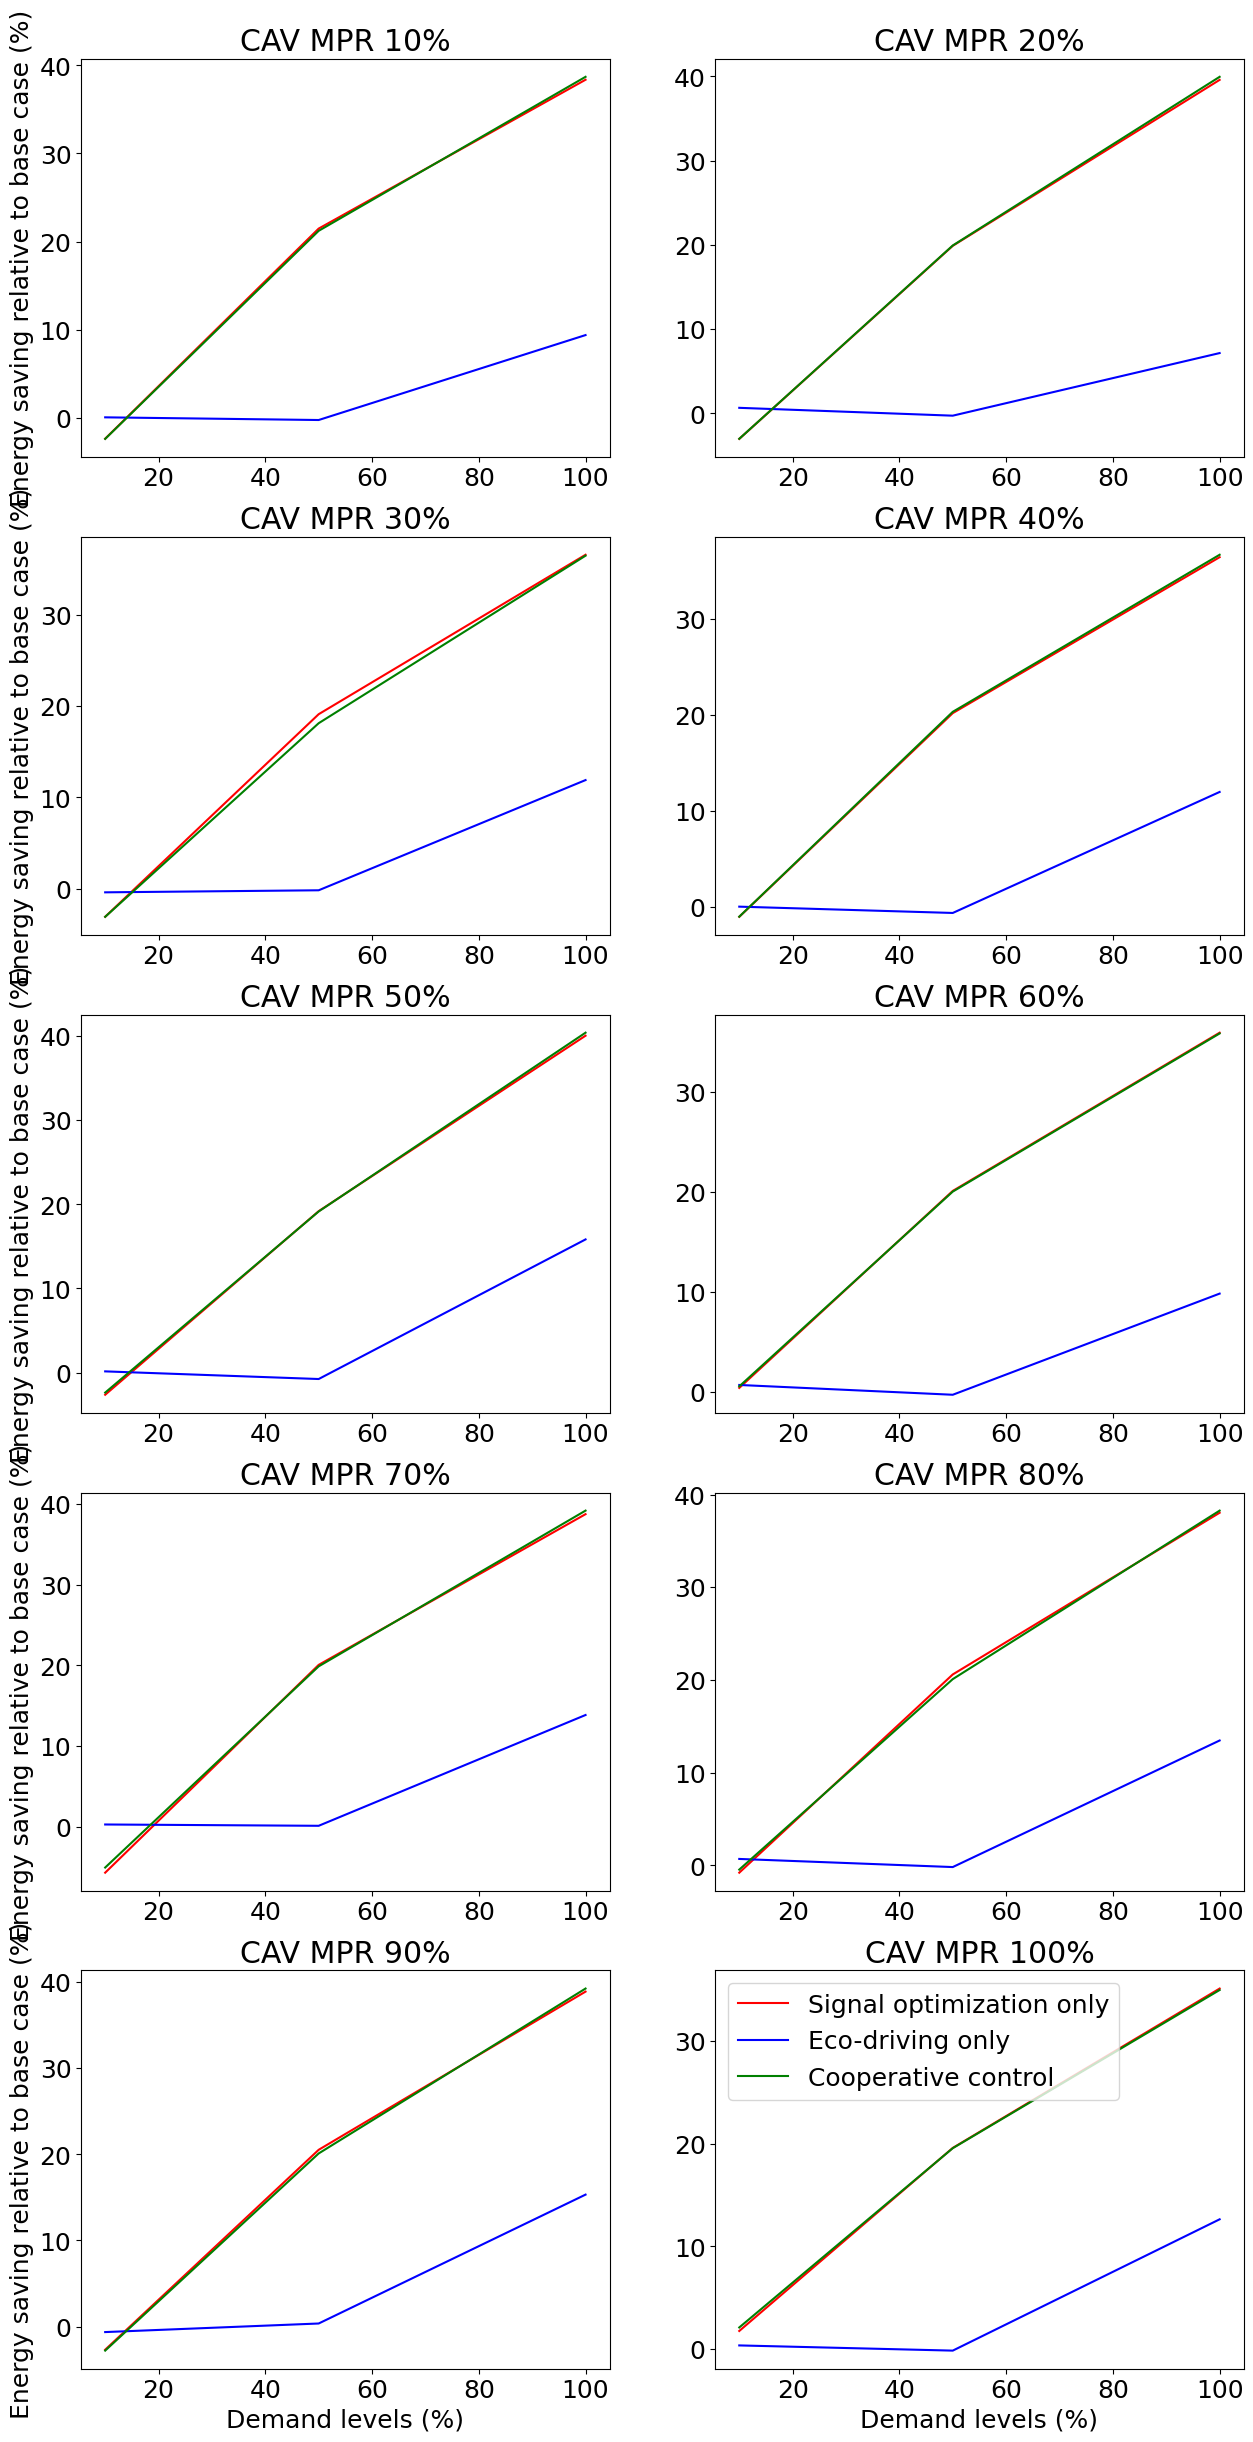

In [8]:
# results visualization for all vehicles
demand_perct = [10, 50, 100]

# energy_saving vs. cav_percent
cav_perct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(15, 22))
num_row = 3
num_fig_per_row = int(len(demand_perct) / num_row)
subplot_idx = 1
plt.rcParams.update({'font.size': 18})

for demand in demand_perct:
    energy_saving_sig_opt = savings.loc[savings['demand'] == demand, 'overall_signal_optimization_energy']
    energy_saving_eco_drive = savings.loc[savings['demand'] == demand, 'overall_eco-drive_only_energy']
    energy_saving_cooperative_control = savings.loc[savings['demand'] == demand, 'overall_cooperative_control_energy']
    plt.subplot(num_row, num_fig_per_row, subplot_idx)
    plt.plot(cav_perct, energy_saving_sig_opt, 'r')
    plt.plot(cav_perct, energy_saving_eco_drive, 'b')
    plt.plot(cav_perct,energy_saving_cooperative_control, 'g')
    plt.ylabel('Energy saving relative to No_Control (%)')
    plt.title('Demand {}'.format(demand))

    if subplot_idx == len(demand_perct):
        plt.xlabel('CAV market penetration (%)')
        plt.legend(['Signal optimization only', 'Eco-driving only', 'Cooperative control'])
    
    subplot_idx += 1

# energy saving vs. demand
cav_perct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(15, 30))
num_row = 5
num_fig_per_row = int(len(cav_perct) / num_row)
subplot_idx = 1
plt.rcParams.update({'font.size': 18})

for cav in cav_perct:
    energy_saving_sig_opt = savings.loc[savings['cav'] == cav, 'overall_signal_optimization_energy']
    energy_saving_eco_drive = savings.loc[savings['cav'] == cav, 'overall_eco-drive_only_energy']
    energy_saving_cooperative_control = savings.loc[savings['cav'] == cav, 'overall_cooperative_control_energy']
    plt.subplot(num_row, num_fig_per_row, subplot_idx)
    plt.plot(demand_perct, energy_saving_sig_opt, 'r')
    plt.plot(demand_perct, energy_saving_eco_drive, 'b')
    plt.plot(demand_perct,energy_saving_cooperative_control, 'g')
    plt.title('CAV MPR {}%'.format(cav))

    if subplot_idx % 2 == 1:
        plt.ylabel('Energy saving relative to base case (%)')
    
    if subplot_idx == len(cav_perct)-1:
        plt.xlabel('Demand levels (%)')

    if subplot_idx == len(cav_perct):
        plt.xlabel('Demand levels (%)')
        plt.legend(['Signal optimization only', 'Eco-driving only', 'Cooperative control'])
    
    subplot_idx += 1

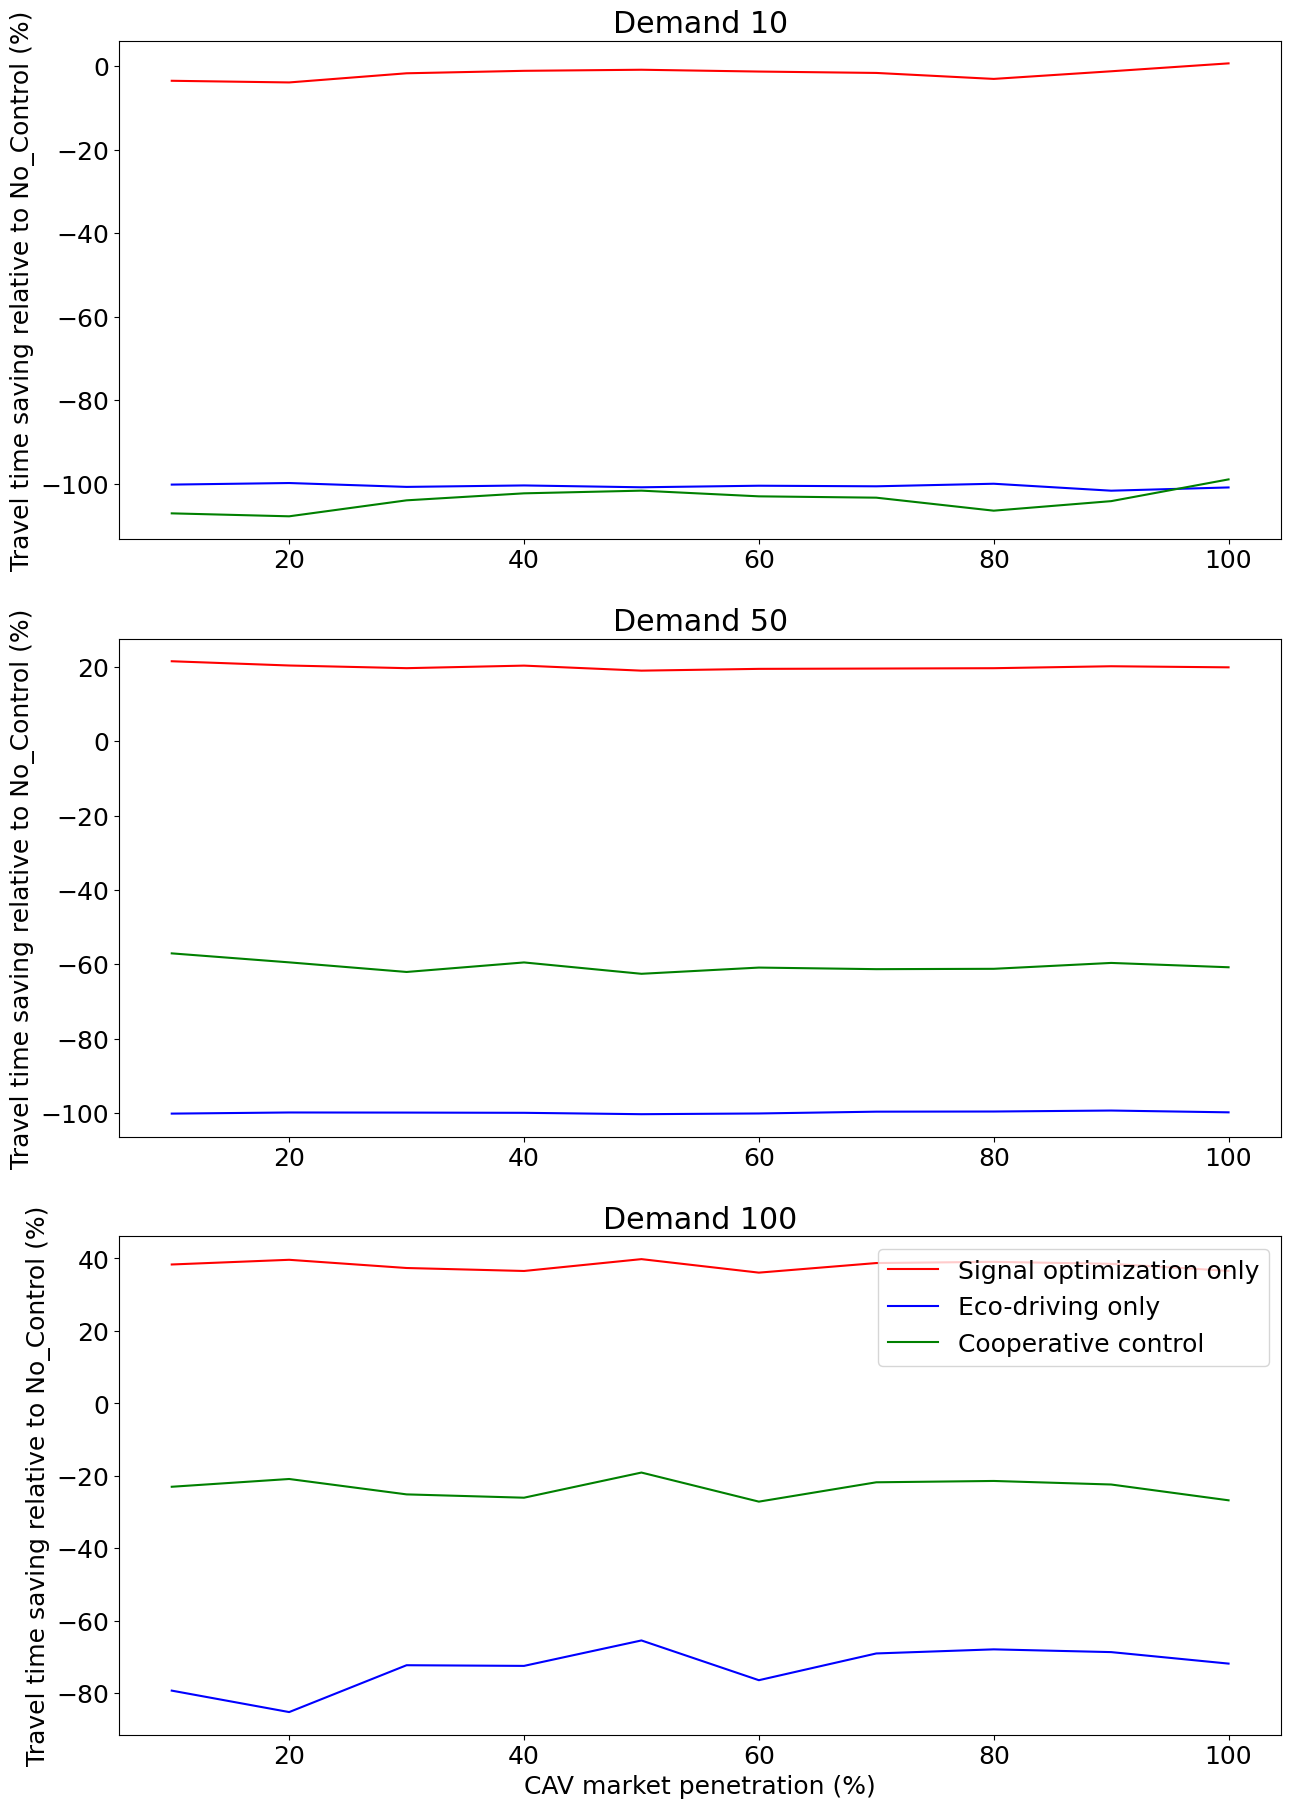

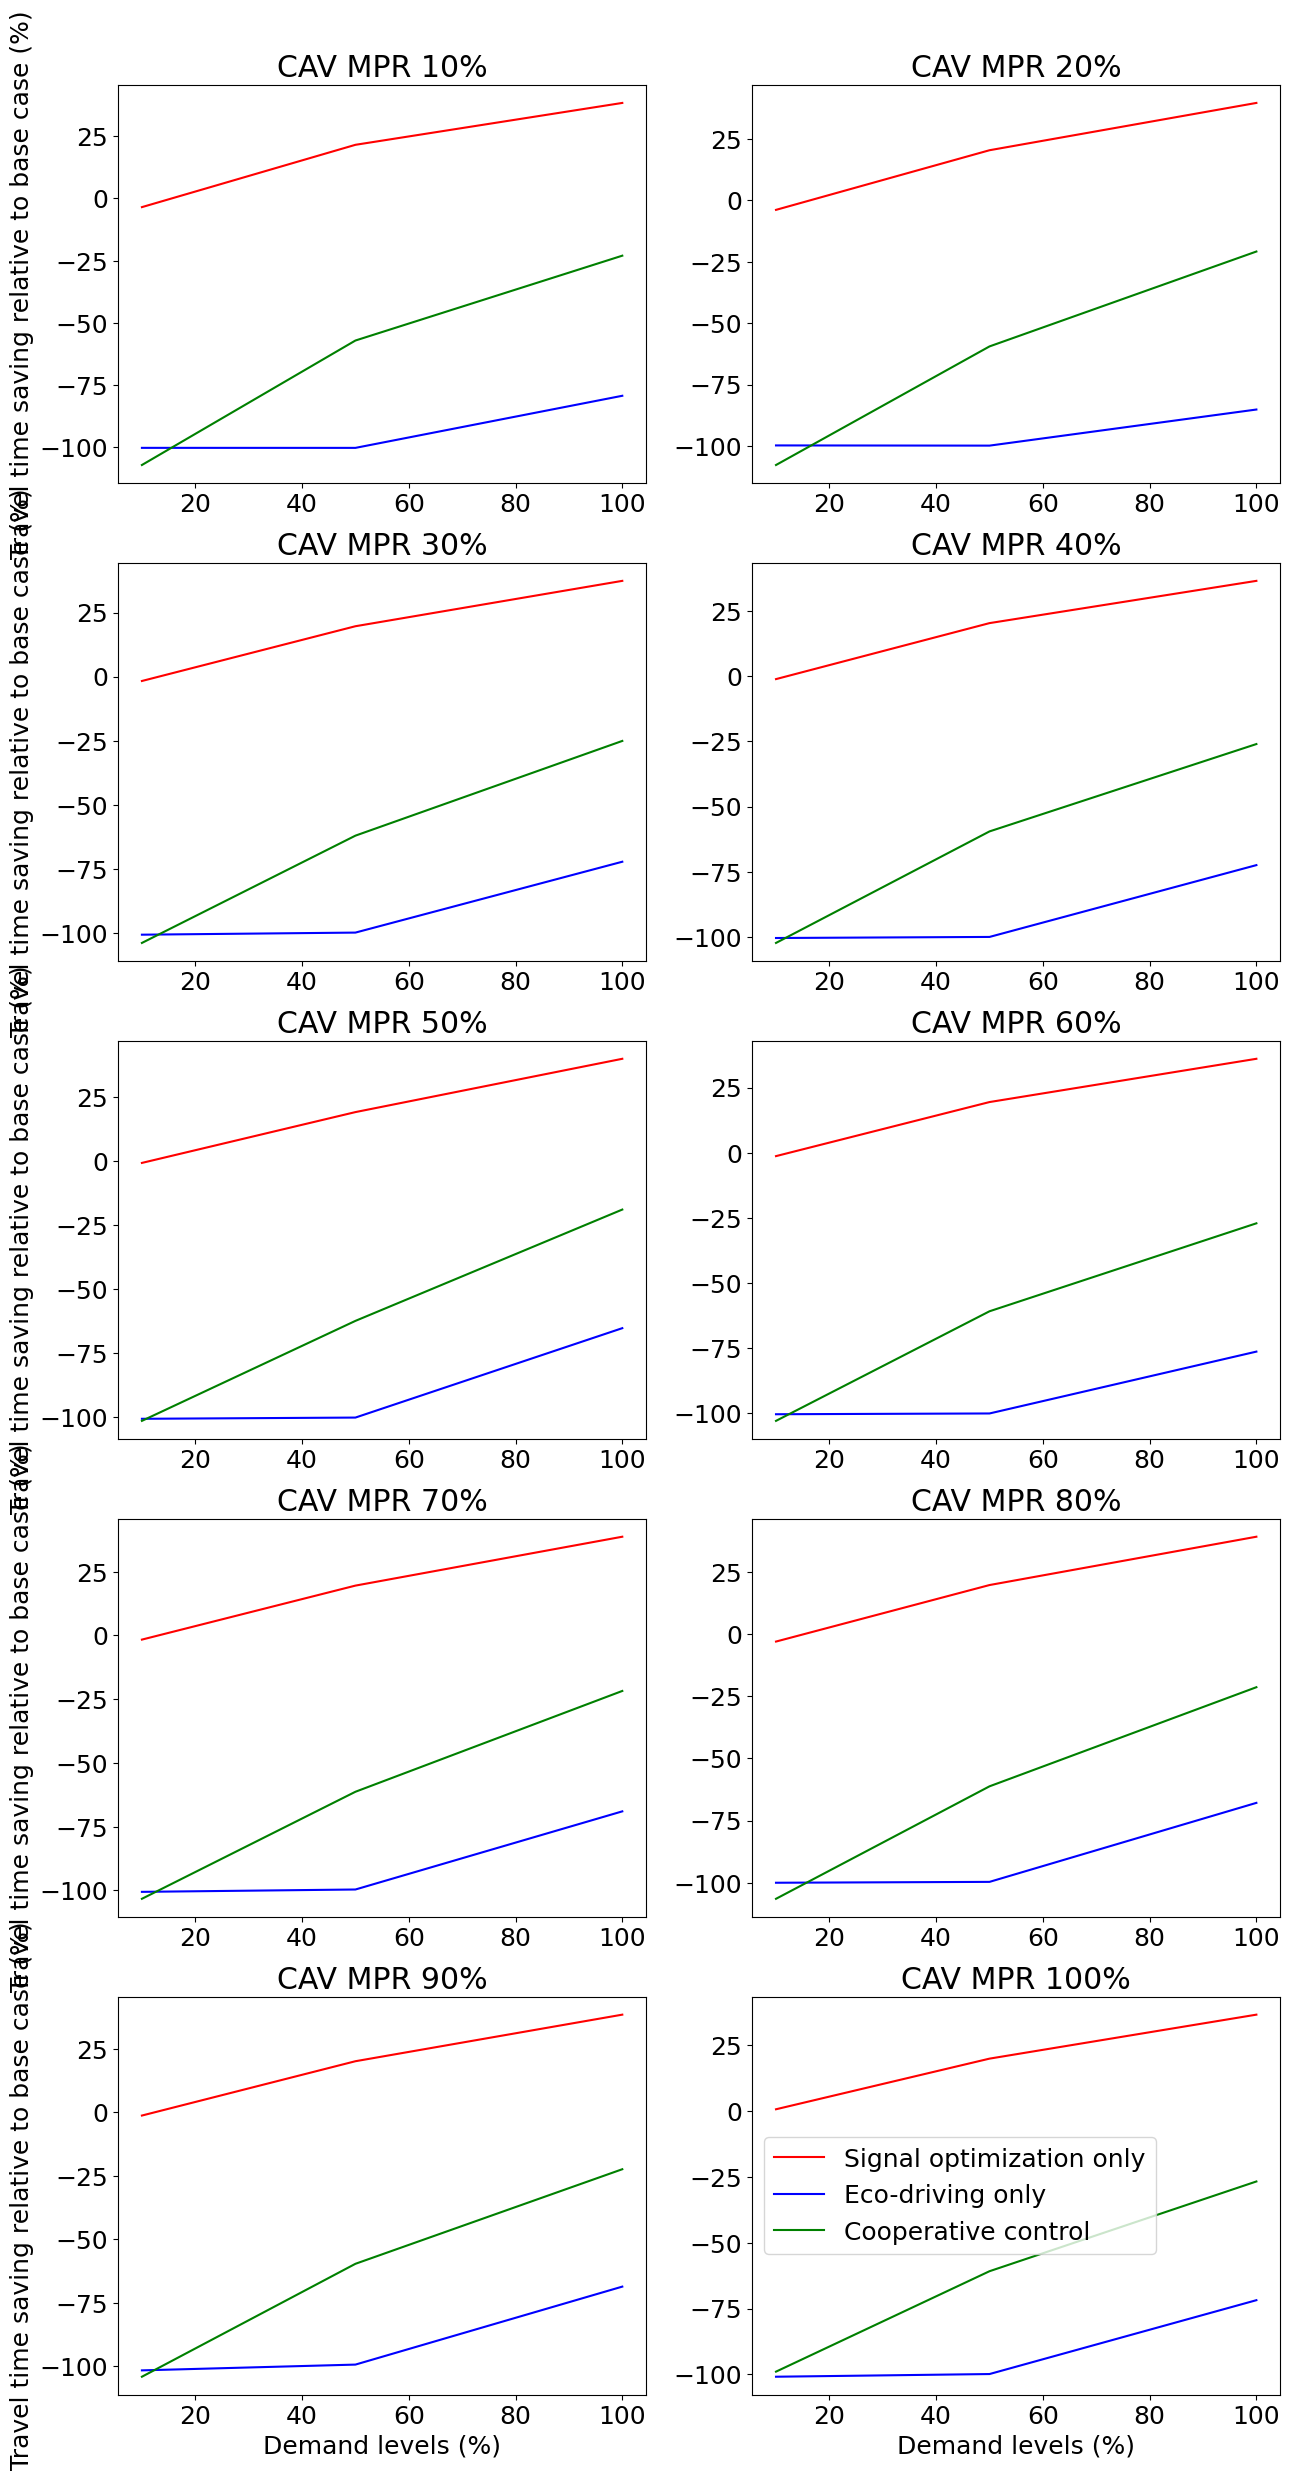

In [9]:
# travel_time_saving vs. cav_percent
cav_perct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(15, 22))
num_row = 3
num_fig_per_row = int(len(demand_perct) / num_row)
subplot_idx = 1
plt.rcParams.update({'font.size': 18})

for demand in demand_perct:
    tt_saving_sig_opt = savings.loc[savings['demand'] == demand, 'overall_signal_optimization_tt']
    tt_saving_eco_drive = savings.loc[savings['demand'] == demand, 'overall_eco-drive_only_tt']
    tt_saving_cooperative_control = savings.loc[savings['demand'] == demand, 'overall_cooperative_control_tt']

    plt.subplot(num_row, num_fig_per_row, subplot_idx)
    plt.plot(cav_perct, tt_saving_sig_opt, 'r')
    plt.plot(cav_perct, tt_saving_eco_drive, 'b')
    plt.plot(cav_perct,tt_saving_cooperative_control, 'g')
    plt.ylabel('Travel time saving relative to No_Control (%)')
    plt.title('Demand {}'.format(demand))

    if subplot_idx == len(demand_perct):
        plt.xlabel('CAV market penetration (%)')
        plt.legend(['Signal optimization only', 'Eco-driving only', 'Cooperative control'])
    
    subplot_idx += 1

# travel time saving vs. demand
cav_perct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(15, 30))
num_row = 5
num_fig_per_row = int(len(cav_perct) / num_row)
subplot_idx = 1
plt.rcParams.update({'font.size': 18})

for cav in cav_perct:
    tt_saving_sig_opt = savings.loc[savings['cav'] == cav, 'overall_signal_optimization_tt']
    tt_saving_eco_drive = savings.loc[savings['cav'] == cav, 'overall_eco-drive_only_tt']
    tt_saving_cooperative_control = savings.loc[savings['cav'] == cav, 'overall_cooperative_control_tt']
    plt.subplot(num_row, num_fig_per_row, subplot_idx)
    plt.plot(demand_perct, tt_saving_sig_opt, 'r')
    plt.plot(demand_perct, tt_saving_eco_drive, 'b')
    plt.plot(demand_perct, tt_saving_cooperative_control, 'g')
    plt.title('CAV MPR {}%'.format(cav))

    if subplot_idx % 2 == 1:
        plt.ylabel('Travel time saving relative to base case (%)')
    
    if subplot_idx == len(cav_perct)-1:
        plt.xlabel('Demand levels (%)')

    if subplot_idx == len(cav_perct):
        plt.xlabel('Demand levels (%)')
        plt.legend(['Signal optimization only', 'Eco-driving only', 'Cooperative control'])
    
    subplot_idx += 1

In [32]:
test = pd.read_csv('results/Signal_optimization_only_demand10_CAV70_5890.csv', delimiter='\t')
len(test.section_id.unique())

17